## Project 

### Import Lib

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#permet d'afficher toutes les lignes
#suppress -> chiffres en notation normal et pas en format scientifique
import pandas as pd
import warnings
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

### Import data 

In [3]:
na_values = ['na']

In [4]:
data = pd.read_csv('./fbref_outfield_player_stats_combined_latest.csv', sep=',',na_values=na_values)

In [5]:
# Filtrage en gardant seulement championnat
data = data.loc[data["League Name"]!='Champions-League']
data = data.loc[data["League Name"]!='Europa-League']
data

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season
0,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,28,26,2081,23.1,...,0.0,0.0,0.0,213.0,22.0,37.0,37.3,Bundesliga,20,2017-2018
1,Abdou Diallo,sn SEN,DF,Mainz 05,21.0,1996.0,27,27,2415,26.8,...,0.0,1.0,0.0,310.0,74.0,28.0,72.5,Bundesliga,20,2017-2018
2,Ademola Lookman,eng ENG,"MF,FW",RB Leipzig,19.0,1997.0,11,7,574,6.4,...,0.0,0.0,0.0,59.0,3.0,6.0,33.3,Bundesliga,20,2017-2018
3,Admir Mehmedi,ch SUI,"DF,MF",Leverkusen,26.0,1991.0,12,8,700,7.8,...,0.0,1.0,0.0,79.0,10.0,5.0,66.7,Bundesliga,20,2017-2018
4,Admir Mehmedi,ch SUI,"FW,MF",Wolfsburg,26.0,1991.0,5,3,290,3.2,...,0.0,0.0,0.0,20.0,8.0,8.0,50.0,Bundesliga,20,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13249,Zlatan Ibrahimović,se SWE,FW,Milan,40.0,1981.0,5,2,196,2.2,...,1.0,0.0,1.0,7.0,5.0,3.0,62.5,Serie-A,11,2021-2022
13250,Álvaro Morata,es ESP,FW,Juventus,29.0,1992.0,10,7,625,6.9,...,0.0,0.0,0.0,27.0,15.0,14.0,51.7,Serie-A,11,2021-2022
13251,Álvaro Odriozola,es ESP,DF,Fiorentina,25.0,1995.0,8,4,434,4.8,...,0.0,0.0,0.0,35.0,0.0,5.0,0.0,Serie-A,11,2021-2022
13252,Łukasz Skorupski,pl POL,GK,Bologna,30.0,1991.0,11,11,990,11.0,...,0.0,0.0,0.0,42.0,0.0,0.0,NaN,Serie-A,11,2021-2022


In [6]:
data

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season
0,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,28,26,2081,23.1,...,0.0,0.0,0.0,213.0,22.0,37.0,37.3,Bundesliga,20,2017-2018
1,Abdou Diallo,sn SEN,DF,Mainz 05,21.0,1996.0,27,27,2415,26.8,...,0.0,1.0,0.0,310.0,74.0,28.0,72.5,Bundesliga,20,2017-2018
2,Ademola Lookman,eng ENG,"MF,FW",RB Leipzig,19.0,1997.0,11,7,574,6.4,...,0.0,0.0,0.0,59.0,3.0,6.0,33.3,Bundesliga,20,2017-2018
3,Admir Mehmedi,ch SUI,"DF,MF",Leverkusen,26.0,1991.0,12,8,700,7.8,...,0.0,1.0,0.0,79.0,10.0,5.0,66.7,Bundesliga,20,2017-2018
4,Admir Mehmedi,ch SUI,"FW,MF",Wolfsburg,26.0,1991.0,5,3,290,3.2,...,0.0,0.0,0.0,20.0,8.0,8.0,50.0,Bundesliga,20,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13249,Zlatan Ibrahimović,se SWE,FW,Milan,40.0,1981.0,5,2,196,2.2,...,1.0,0.0,1.0,7.0,5.0,3.0,62.5,Serie-A,11,2021-2022
13250,Álvaro Morata,es ESP,FW,Juventus,29.0,1992.0,10,7,625,6.9,...,0.0,0.0,0.0,27.0,15.0,14.0,51.7,Serie-A,11,2021-2022
13251,Álvaro Odriozola,es ESP,DF,Fiorentina,25.0,1995.0,8,4,434,4.8,...,0.0,0.0,0.0,35.0,0.0,5.0,0.0,Serie-A,11,2021-2022
13252,Łukasz Skorupski,pl POL,GK,Bologna,30.0,1991.0,11,11,990,11.0,...,0.0,0.0,0.0,42.0,0.0,0.0,NaN,Serie-A,11,2021-2022


### Data preprocessing 

In [7]:
data['Nation'] = data['Nation'].astype('string')
data = data.dropna(subset=['Nation'])
data["Nation_new"] = data['Nation'].apply(lambda x: x[3:7])
data = data.drop(columns=['Nation'])

In [8]:
data["Nation_new"]

0         GER
1         SEN
2         ENG
3         SUI
4         SUI
         ... 
13249     SWE
13250     ESP
13251     ESP
13252     POL
13253     ROU
Name: Nation_new, Length: 13253, dtype: object

In [9]:
# Colonnes utiles
mycolumns = ['Player_id','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [10]:
data['Pos']

0        MF,FW
1           DF
2        MF,FW
3        DF,MF
4        FW,MF
         ...  
13249       FW
13250       FW
13251       DF
13252       GK
13253       DF
Name: Pos, Length: 13253, dtype: object

In [11]:
# recodage des modalités
data['Pos'] = data['Pos'].str.split(',')
data['Season'] = data['Season'].str.split('-')

In [12]:
data['Pos']

0        [MF, FW]
1            [DF]
2        [MF, FW]
3        [DF, MF]
4        [FW, MF]
           ...   
13249        [FW]
13250        [FW]
13251        [DF]
13252        [GK]
13253        [DF]
Name: Pos, Length: 13253, dtype: object

In [13]:
data['Pos'] = [elem[0] for elem in data['Pos']]
data['Season'] = [elem[1] for elem in data['Season']]

In [14]:
data['Pos']

0        MF
1        DF
2        MF
3        DF
4        FW
         ..
13249    FW
13250    FW
13251    DF
13252    GK
13253    DF
Name: Pos, Length: 13253, dtype: object

In [15]:
display(data['Pos'],
        data['Season'])

0        MF
1        DF
2        MF
3        DF
4        FW
         ..
13249    FW
13250    FW
13251    DF
13252    GK
13253    DF
Name: Pos, Length: 13253, dtype: object

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
13249    2022
13250    2022
13251    2022
13252    2022
13253    2022
Name: Season, Length: 13253, dtype: object

In [16]:
data['Player_id']=data['Player']+data['Season']

In [17]:
data['Player_id']

0                Aaron Hunt2018
1              Abdou Diallo2018
2           Ademola Lookman2018
3             Admir Mehmedi2018
4             Admir Mehmedi2018
                  ...          
13249    Zlatan Ibrahimović2022
13250         Álvaro Morata2022
13251      Álvaro Odriozola2022
13252      Łukasz Skorupski2022
13253           Ștefan Radu2022
Name: Player_id, Length: 13253, dtype: object

In [18]:
#

In [19]:
data_ok=data[mycolumns]
data_ok

,Player_id,90s,CrdY,CrdR,Gls/90,Ast/90,xG/90,xA/90,Sh/90,SoT/90,...,Succ,Def 3rd_pression,Mid 3rd_pression,Att 3rd_pression,Touches,Def Pen,Att Pen,Carries,CPA,Fls
0,Aaron Hunt2018,23.1,1,0,0.13,0.09,0.12,0.23,1.17,0.26,...,135.0,102.0,261.0,121.0,1475.0,28.0,68.0,892.0,7.0,27
1,Abdou Diallo2018,26.8,5,0,0.07,0.04,0.09,0.03,0.48,0.11,...,144.0,219.0,109.0,21.0,1496.0,118.0,24.0,866.0,1.0,59
2,Ademola Lookman2018,6.4,1,0,0.78,0.47,0.36,0.54,2.04,0.94,...,30.0,17.0,48.0,24.0,312.0,6.0,30.0,270.0,7.0,12
3,Admir Mehmedi2018,7.8,3,0,0.26,0.39,0.14,0.17,1.67,0.51,...,29.0,32.0,69.0,24.0,519.0,10.0,27.0,340.0,5.0,17
4,Admir Mehmedi2018,3.2,0,0,0.31,0.00,0.04,0.04,1.24,0.31,...,18.0,19.0,24.0,11.0,158.0,4.0,4.0,102.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13249,Zlatan Ibrahimović2022,2.2,1,0,1.38,0.46,0.74,0.07,4.59,1.84,...,3.0,1.0,2.0,6.0,135.0,2.0,13.0,90.0,1.0,1
13250,Álvaro Morata2022,6.9,2,0,0.29,0.00,0.25,0.25,2.45,1.15,...,30.0,12.0,40.0,53.0,253.0,5.0,39.0,173.0,9.0,12
13251,Álvaro Odriozola2022,4.8,4,0,0.00,0.21,0.07,0.12,0.41,0.00,...,20.0,27.0,35.0,16.0,303.0,20.0,8.0,214.0,2.0,7
13252,Łukasz Skorupski2022,11.0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,1.0,0.0,0.0,356.0,316.0,0.0,161.0,0.0,0


In [20]:
#Données non normalisées
liste_90 = ['CrdY','CrdR','Dist','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [21]:
# Filtres sur les joueurs ayant + de 6 matchs 
data_ok_flt = data_ok.loc[data_ok['90s'] > 6]  

In [22]:
# Boucle pour normaliser les données (qui ne l'étaient pas)
for i in liste_90:
    data_ok_flt[str(i)]=data_ok_flt[str(i)]/data_ok_flt['90s']
del data_ok_flt['90s']
data_ok_flt

,Player_id,CrdY,CrdR,Gls/90,Ast/90,xG/90,xA/90,Sh/90,SoT/90,Dist,...,Succ,Def 3rd_pression,Mid 3rd_pression,Att 3rd_pression,Touches,Def Pen,Att Pen,Carries,CPA,Fls
0,Aaron Hunt2018,0.043290,0.0,0.13,0.09,0.12,0.23,1.17,0.26,1.012987,...,5.844156,4.415584,11.298701,5.238095,63.852814,1.212121,2.943723,38.614719,0.303030,1.168831
1,Abdou Diallo2018,0.186567,0.0,0.07,0.04,0.09,0.03,0.48,0.11,0.246269,...,5.373134,8.171642,4.067164,0.783582,55.820896,4.402985,0.895522,32.313433,0.037313,2.201493
2,Ademola Lookman2018,0.156250,0.0,0.78,0.47,0.36,0.54,2.04,0.94,2.015625,...,4.687500,2.656250,7.500000,3.750000,48.750000,0.937500,4.687500,42.187500,1.093750,1.875000
3,Admir Mehmedi2018,0.384615,0.0,0.26,0.39,0.14,0.17,1.67,0.51,2.166667,...,3.717949,4.102564,8.846154,3.076923,66.538462,1.282051,3.461538,43.589744,0.641026,2.179487
6,Albin Ekdal2018,0.243902,0.0,0.00,0.08,0.04,0.08,0.65,0.08,1.048780,...,6.991870,7.235772,9.430894,1.626016,56.260163,2.764228,1.300813,34.308943,0.081301,1.138211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,Wilfried Singo2022,0.103093,0.0,0.10,0.21,0.06,0.06,1.34,0.10,1.567010,...,3.505155,3.711340,5.773196,3.917526,60.309278,2.268041,3.092784,37.422680,1.030928,1.855670
13244,Wojciech Szczęsny2022,0.222222,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,...,0.000000,0.111111,0.000000,0.000000,31.888889,29.111111,0.000000,13.777778,0.000000,0.222222
13245,Yayah Kallon2022,0.468750,0.0,0.00,0.16,0.18,0.16,1.57,0.16,2.843750,...,6.406250,3.125000,10.000000,7.187500,40.000000,0.468750,5.000000,31.250000,2.343750,2.343750
13250,Álvaro Morata2022,0.289855,0.0,0.29,0.00,0.25,0.25,2.45,1.15,1.942029,...,4.347826,1.739130,5.797101,7.681159,36.666667,0.724638,5.652174,25.072464,1.304348,1.739130


### Traitement des NaN

In [23]:
data_ok_flt.isna().sum(axis = 0)

Player_id             0
CrdY                  0
CrdR                  0
Gls/90                0
Ast/90                0
xG/90                 0
xA/90                 0
Sh/90                 0
SoT/90                0
Dist                668
FK                    0
Cmp                   0
Att                   0
TotDist               0
PrgDist               0
Cmp_short             0
Att_short             0
Cmp_medium            0
Att_medium            0
Cmp_long              0
Att_long              0
KP                    0
1/3                   0
PPA                   0
CrsPA                 0
Prog                  0
SCA90                 0
PassLive              0
PassDead              0
Drib                  0
Fld                   0
Def                   0
GCA90                 0
PassLive_AMB          0
PassDead_AMB          0
Drib_AMB              0
Fld_AMB               0
Def_AMB               0
Tkl                   0
TklW                  0
Def 3rd               0
Mid 3rd         

In [24]:
data_ok_flt=data_ok_flt.drop(columns=['Dist'])

In [25]:
data_ok_flt.to_csv('data_ok_flt')

In [26]:
data_ok_flt

,Player_id,CrdY,CrdR,Gls/90,Ast/90,xG/90,xA/90,Sh/90,SoT/90,FK,...,Succ,Def 3rd_pression,Mid 3rd_pression,Att 3rd_pression,Touches,Def Pen,Att Pen,Carries,CPA,Fls
0,Aaron Hunt2018,0.043290,0.0,0.13,0.09,0.12,0.23,1.17,0.26,0.432900,...,5.844156,4.415584,11.298701,5.238095,63.852814,1.212121,2.943723,38.614719,0.303030,1.168831
1,Abdou Diallo2018,0.186567,0.0,0.07,0.04,0.09,0.03,0.48,0.11,0.000000,...,5.373134,8.171642,4.067164,0.783582,55.820896,4.402985,0.895522,32.313433,0.037313,2.201493
2,Ademola Lookman2018,0.156250,0.0,0.78,0.47,0.36,0.54,2.04,0.94,0.156250,...,4.687500,2.656250,7.500000,3.750000,48.750000,0.937500,4.687500,42.187500,1.093750,1.875000
3,Admir Mehmedi2018,0.384615,0.0,0.26,0.39,0.14,0.17,1.67,0.51,0.128205,...,3.717949,4.102564,8.846154,3.076923,66.538462,1.282051,3.461538,43.589744,0.641026,2.179487
6,Albin Ekdal2018,0.243902,0.0,0.00,0.08,0.04,0.08,0.65,0.08,0.000000,...,6.991870,7.235772,9.430894,1.626016,56.260163,2.764228,1.300813,34.308943,0.081301,1.138211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,Wilfried Singo2022,0.103093,0.0,0.10,0.21,0.06,0.06,1.34,0.10,0.000000,...,3.505155,3.711340,5.773196,3.917526,60.309278,2.268041,3.092784,37.422680,1.030928,1.855670
13244,Wojciech Szczęsny2022,0.222222,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,...,0.000000,0.111111,0.000000,0.000000,31.888889,29.111111,0.000000,13.777778,0.000000,0.222222
13245,Yayah Kallon2022,0.468750,0.0,0.00,0.16,0.18,0.16,1.57,0.16,0.000000,...,6.406250,3.125000,10.000000,7.187500,40.000000,0.468750,5.000000,31.250000,2.343750,2.343750
13250,Álvaro Morata2022,0.289855,0.0,0.29,0.00,0.25,0.25,2.45,1.15,0.000000,...,4.347826,1.739130,5.797101,7.681159,36.666667,0.724638,5.652174,25.072464,1.304348,1.739130


In [27]:
#Séparation des variables 
X = data_ok_flt.drop(['Player_id'], axis=1)

In [28]:
# Categorical variable
X_cat = data_ok_flt[['Player_id']]

In [29]:
X_cat

,Player_id
0,Aaron Hunt2018
1,Abdou Diallo2018
2,Ademola Lookman2018
3,Admir Mehmedi2018
6,Albin Ekdal2018
...,...
13243,Wilfried Singo2022
13244,Wojciech Szczęsny2022
13245,Yayah Kallon2022
13250,Álvaro Morata2022


In [30]:
X

,CrdY,CrdR,Gls/90,Ast/90,xG/90,xA/90,Sh/90,SoT/90,FK,Cmp,...,Succ,Def 3rd_pression,Mid 3rd_pression,Att 3rd_pression,Touches,Def Pen,Att Pen,Carries,CPA,Fls
0,0.043290,0.0,0.13,0.09,0.12,0.23,1.17,0.26,0.432900,38.225108,...,5.844156,4.415584,11.298701,5.238095,63.852814,1.212121,2.943723,38.614719,0.303030,1.168831
1,0.186567,0.0,0.07,0.04,0.09,0.03,0.48,0.11,0.000000,33.768657,...,5.373134,8.171642,4.067164,0.783582,55.820896,4.402985,0.895522,32.313433,0.037313,2.201493
2,0.156250,0.0,0.78,0.47,0.36,0.54,2.04,0.94,0.156250,27.500000,...,4.687500,2.656250,7.500000,3.750000,48.750000,0.937500,4.687500,42.187500,1.093750,1.875000
3,0.384615,0.0,0.26,0.39,0.14,0.17,1.67,0.51,0.128205,41.153846,...,3.717949,4.102564,8.846154,3.076923,66.538462,1.282051,3.461538,43.589744,0.641026,2.179487
6,0.243902,0.0,0.00,0.08,0.04,0.08,0.65,0.08,0.000000,34.959350,...,6.991870,7.235772,9.430894,1.626016,56.260163,2.764228,1.300813,34.308943,0.081301,1.138211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,0.103093,0.0,0.10,0.21,0.06,0.06,1.34,0.10,0.000000,32.886598,...,3.505155,3.711340,5.773196,3.917526,60.309278,2.268041,3.092784,37.422680,1.030928,1.855670
13244,0.222222,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,24.222222,...,0.000000,0.111111,0.000000,0.000000,31.888889,29.111111,0.000000,13.777778,0.000000,0.222222
13245,0.468750,0.0,0.00,0.16,0.18,0.16,1.57,0.16,0.000000,15.937500,...,6.406250,3.125000,10.000000,7.187500,40.000000,0.468750,5.000000,31.250000,2.343750,2.343750
13250,0.289855,0.0,0.29,0.00,0.25,0.25,2.45,1.15,0.000000,17.246377,...,4.347826,1.739130,5.797101,7.681159,36.666667,0.724638,5.652174,25.072464,1.304348,1.739130


In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer

In [32]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_new = imp_num.fit_transform(X)
X_new = StandardScaler().fit_transform(X_new)

### Choix du nombre de clusters avec WCSS

In [33]:
wcss = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_new)
  wcss.append(km.inertia_)

In [34]:
wcss

[449386.9999999991,
 352032.456719312,
 296473.3454610137,
 268635.09671599325,
 245700.82302309477,
 228958.03075885976,
 220408.78168011986,
 211669.6846447477,
 204747.6934234175,
 198141.09139309294,
 193842.66328489693]

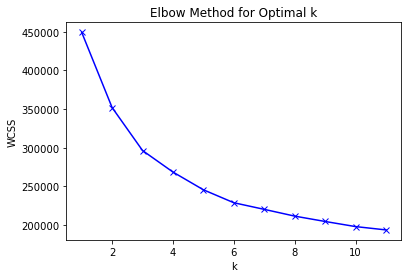

In [35]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

### PCA (Principal Component Analisys)

In [36]:
pca = PCA(n_components=0.8)
df_pca = pca.fit_transform(X_new)

In [37]:
df_pca

array([[ 2.87485481,  2.44745005,  2.81311342, ..., -1.55449824,
        -0.73502972,  0.43757208],
       [-2.38270509,  0.84249755, -1.68171225, ...,  0.72239914,
        -0.27766634, -0.85456522],
       [10.04436486, -0.67312759,  4.62653577, ...,  3.80344468,
        -1.79707423, -2.6233566 ],
       ...,
       [ 6.54851041, -1.46621236, -2.19108614, ...,  1.82467222,
         0.97287369,  2.35904852],
       [ 4.34941543, -3.84857782, -0.54309759, ..., -1.1480522 ,
         0.80640004, -0.9145923 ],
       [-5.45934643, -6.68231642,  2.55749891, ..., -0.4874183 ,
         0.04829126,  0.43594852]])

In [38]:
X_new.shape

(8479, 53)

In [39]:
df_pca.shape

(8479, 9)

In [40]:
pca.explained_variance_ratio_

array([0.28376733, 0.23957561, 0.10633721, 0.04697363, 0.03290866,
       0.02643687, 0.02370882, 0.0212857 , 0.01950183])

In [41]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [42]:
exp_var

[28.4, 24.0, 10.6, 4.7, 3.3, 2.6, 2.4, 2.1, 2.0]

In [43]:
summ=0
for i in exp_var:
    summ=summ+i

In [44]:
summ

80.1

### Choix du nombre de clusters avec la méthode de la silhouette

 https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters =  2  Average score:  0.2323092156632445
For n_clusters =  3  Average score:  0.1912207789661699
For n_clusters =  4  Average score:  0.22499028888600148
For n_clusters =  5  Average score:  0.1896201819330491
For n_clusters =  6  Average score:  0.1836370628300736
For n_clusters =  7  Average score:  0.16507211171090833
For n_clusters =  8  Average score:  0.15794017001884975
For n_clusters =  9  Average score:  0.15595598183804732
For n_clusters =  10  Average score:  0.15786593746796637
For n_clusters =  11  Average score:  0.1576231416462087


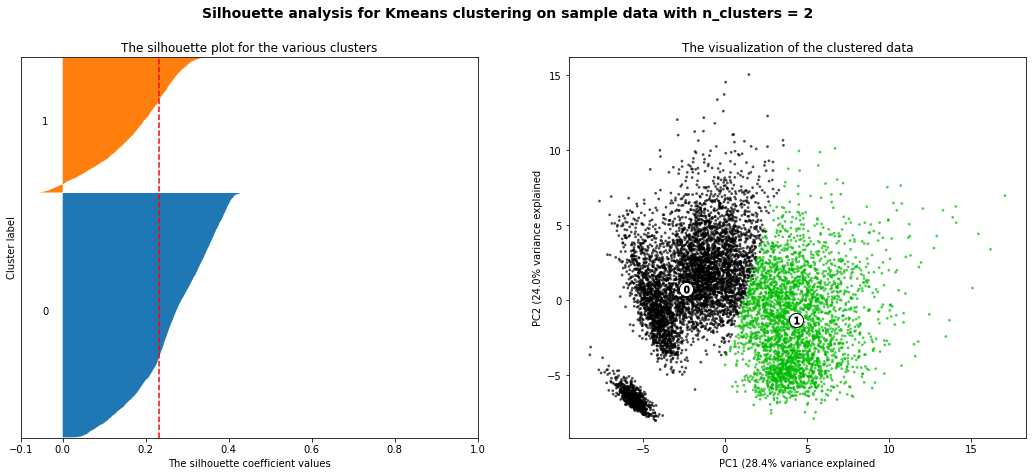

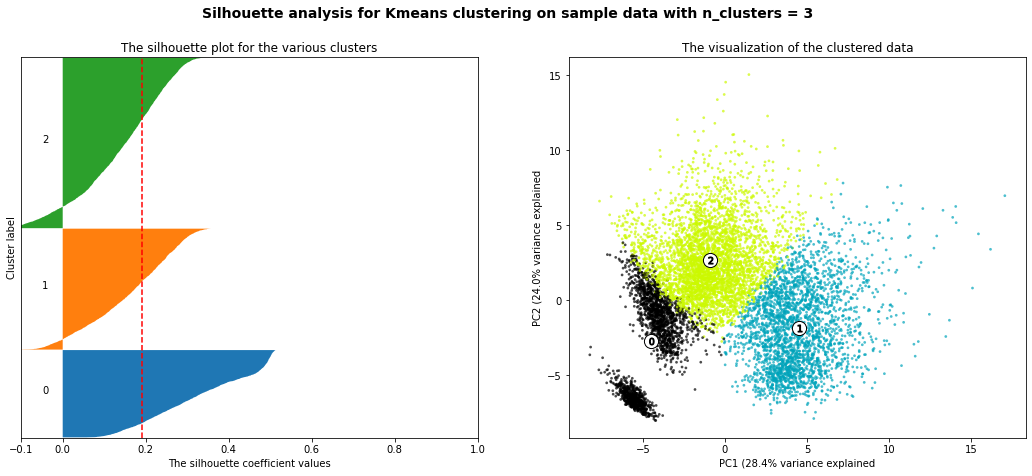

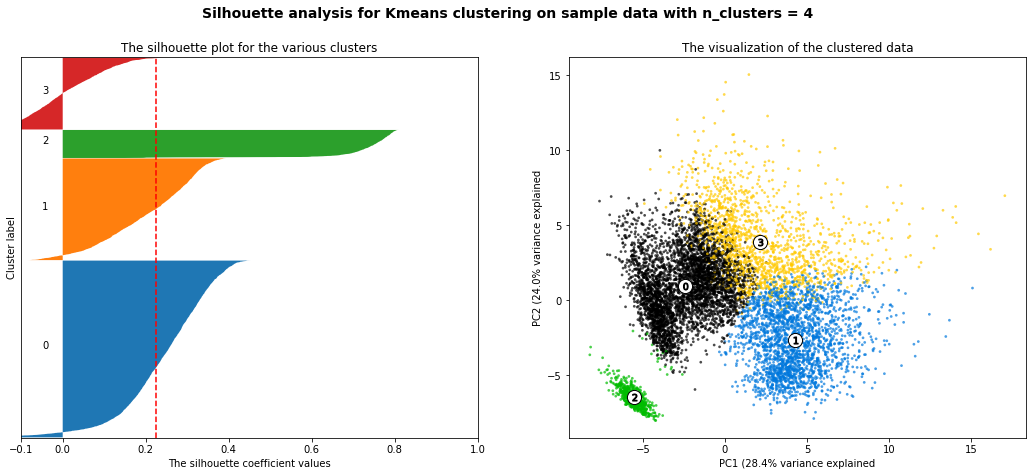

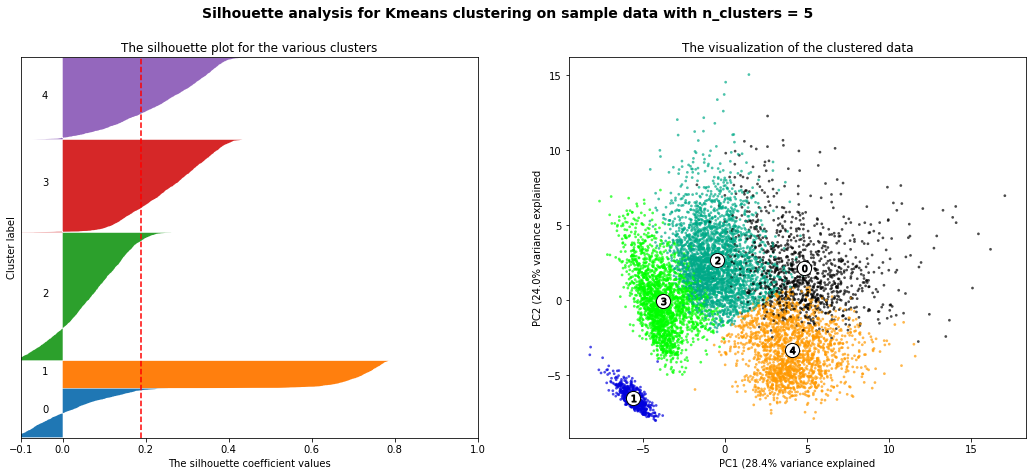

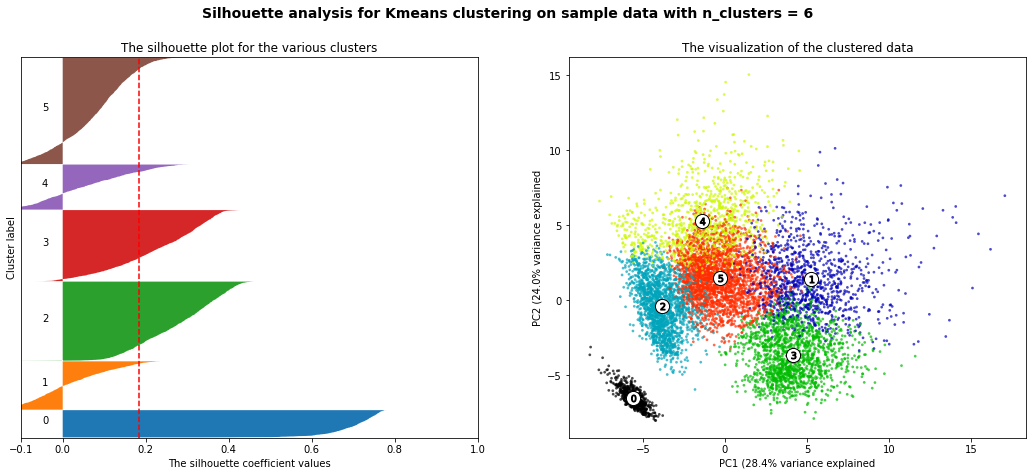

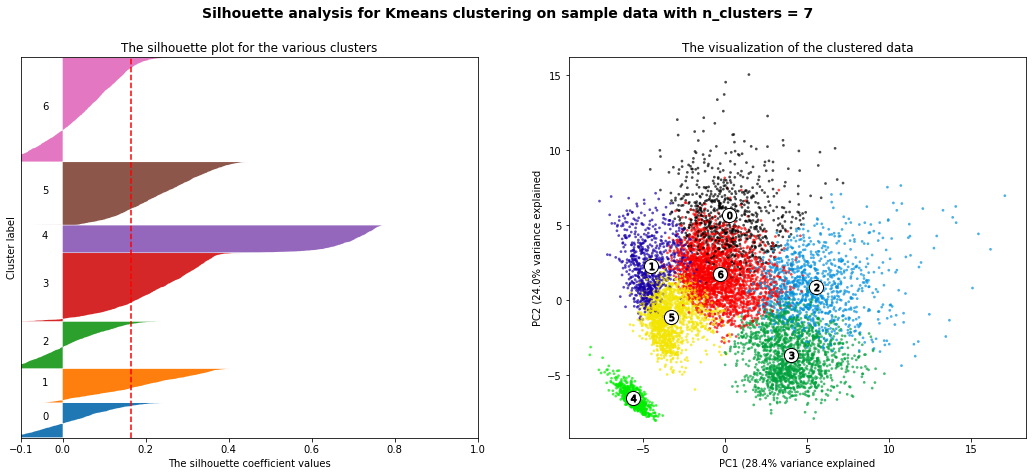

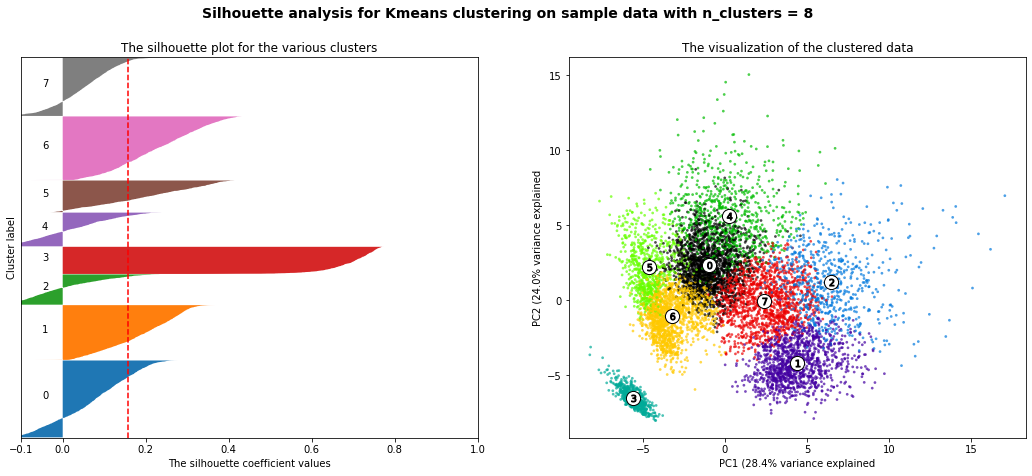

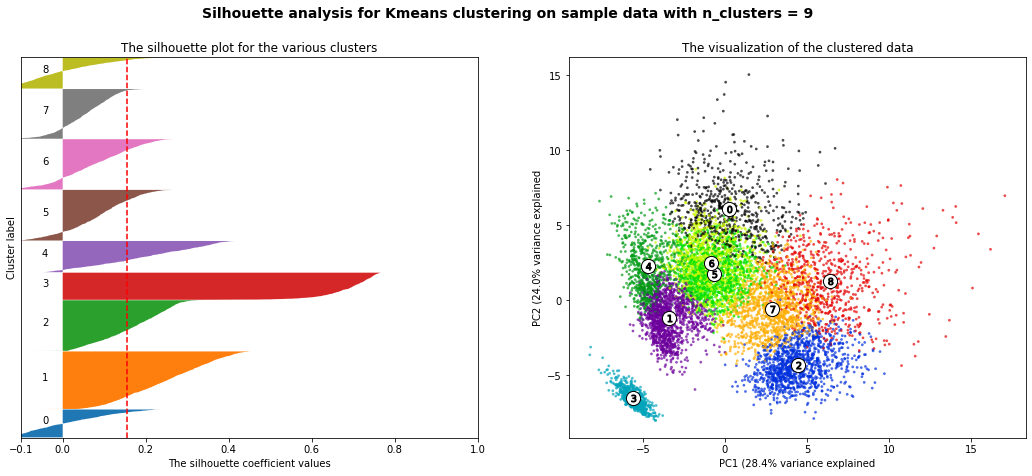

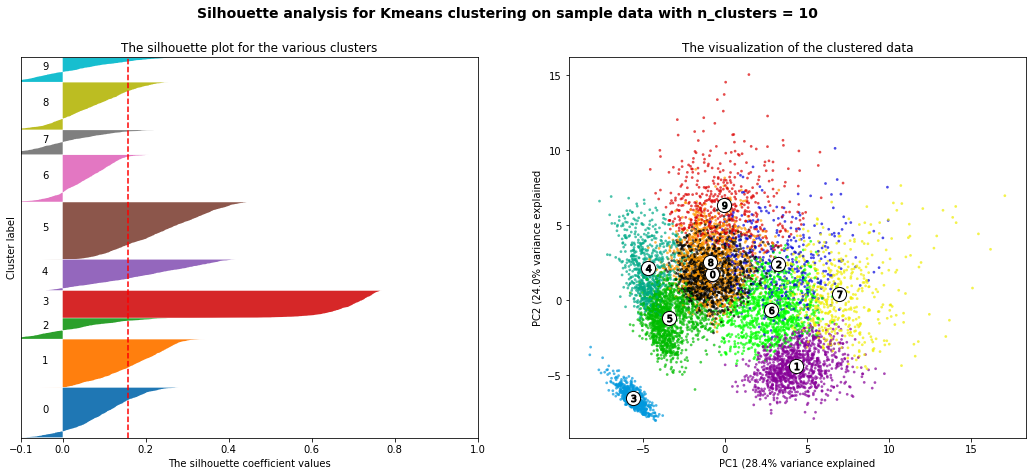

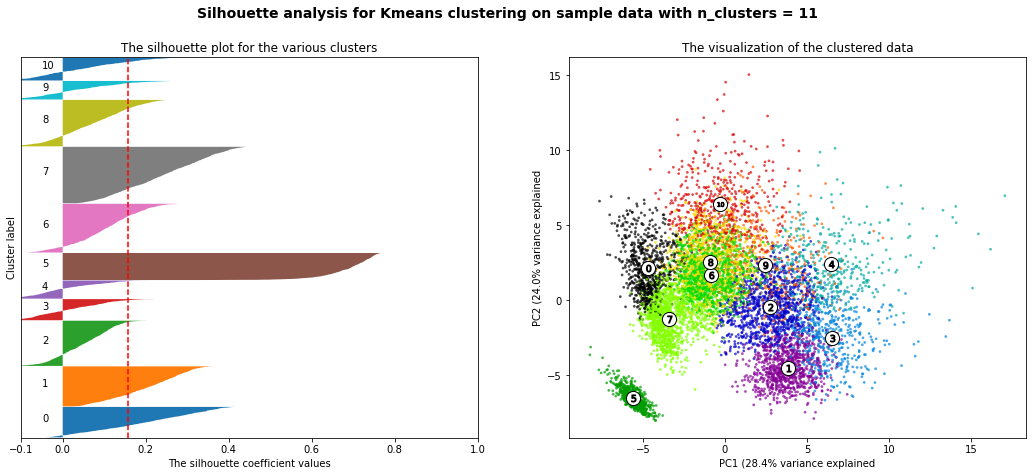

In [45]:
range_n_clusters = range(2, 12)
for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X_new)
  #print(cluster_labels)
  #print(np.unique(cluster_labels))

  silhouette_avg = silhouette_score(X_new, cluster_labels)
  print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X_new, cluster_labels)
  #print(sample_silhouette_values)
  #print(len(sample_silhouette_values))

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    #print(ith_cluster_silhouette_values.shape)

    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    #print(y_upper)

    ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  ax1.set_title("The silhouette plot for the various clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")   

  ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

  centers = clusterer.cluster_centers_
  centers = pca.transform(centers)
  ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '% variance explained')
  ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '% variance explained')

  plt.suptitle(("Silhouette analysis for Kmeans clustering on sample data with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

### Application k-means

In [46]:
km = KMeans(n_clusters=4, n_init=100, random_state=0)
km.fit(X_new)

KMeans(n_clusters=4, n_init=100, random_state=0)

In [47]:
print(km.cluster_centers_)

[[ 0.2627112   0.09632763 -0.47576429 -0.46658018 -0.5331722  -0.56034883
  -0.57267263 -0.56965623 -0.2634526   0.35407947  0.32260666  0.39765997
   0.27518237  0.05264006  0.01473264  0.49933785  0.50541107  0.29979418
   0.17530821 -0.55350904  0.20865613 -0.41159597 -0.17425264  0.09208849
  -0.58186139 -0.52181352 -0.29069356 -0.45940641 -0.4580911  -0.15389027
  -0.53831586 -0.46087484 -0.23197405 -0.30918516 -0.27575688 -0.10701016
   0.42807961  0.36361005  0.62147586  0.20817692 -0.26324     0.44557193
   0.05413651 -0.0067602   0.56528486 -0.2054745  -0.61185198  0.31676943
  -0.00696832 -0.59356308  0.09998273 -0.51740884  0.03283475]
 [-0.20181094 -0.09166938  0.98799409  0.38785303  1.14960656  0.52676074
   1.12527494  1.12915146  0.12887156 -0.94523845 -0.99115742 -1.11351127
  -1.12730165 -0.40264466 -0.29815829 -1.0062101  -0.99700197 -1.0217451
  -1.0101019   0.44289352 -0.70734039  0.22026863  0.02753689 -0.51316273
   0.60147707  0.51585979 -0.10711033  0.79648776 

In [48]:
print(km.labels_)

[3 0 1 3 0 0 1 0 2 3 1 1 0 1 0 1 1 1 1 1 3 0 3 3 3 0 0 0 1 0 2 1 1 1 1 0 1
 3 1 0 3 2 1 0 1 3 0 0 3 3 1 1 0 3 3 0 3 1 0 0 0 0 0 3 1 0 0 0 0 1 3 0 1 0
 0 0 1 1 1 0 3 1 1 3 1 0 0 1 0 0 3 1 0 0 0 0 0 1 1 3 1 3 0 1 1 0 0 0 1 0 0
 0 0 3 1 2 0 3 1 0 0 3 1 0 0 3 1 1 0 0 3 0 3 0 2 0 0 3 1 3 1 0 1 3 0 0 3 0
 1 0 1 2 0 0 0 0 0 1 3 3 1 0 1 1 1 1 1 1 1 0 1 0 0 0 3 2 3 0 0 0 0 0 3 1 3
 3 0 0 0 0 0 1 1 0 1 1 1 3 3 1 1 0 1 0 2 1 0 0 0 0 0 3 0 3 1 1 1 1 3 0 1 1
 3 0 3 0 0 3 3 0 1 0 3 0 0 0 0 0 1 3 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 3 2
 1 3 2 1 3 2 0 0 3 1 2 0 0 0 1 0 0 1 2 2 2 2 0 0 1 1 1 0 0 3 1 1 1 3 0 1 1
 1 0 0 0 0 3 0 0 2 1 1 1 0 3 0 0 3 1 1 0 2 1 0 0 0 1 1 0 0 3 0 0 0 3 0 0 0
 2 0 1 1 1 1 1 3 1 0 0 0 3 0 3 0 1 3 1 0 0 1 0 0 2 2 3 0 1 1 0 1 0 2 1 1 0
 1 1 1 0 3 3 1 0 0 0 1 3 1 3 1 3 0 0 2 1 0 1 0 0 3 3 3 1 3 0 0 3 1 3 1 0 0
 0 3 1 0 0 3 1 3 0 3 1 0 0 2 0 0 0 0 3 1 3 2 1 1 3 0 0 0 0 3 2 1 1 1 0 3 1
 1 1 3 3 3 3 1 0 3 3 0 1 0 0 3 1 2 1 1 0 3 3 0 3 1 0 3 3 1 0 0 3 3 0 0 0 1
 0 0 3 1 1 0 0 1 3 0 0 3 

In [49]:
len(km.labels_)

8479

In [50]:
km.labels_

array([3, 0, 1, 3, 0, 0, 1, 0, 2, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0,
       3, 3, 3, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 3, 1, 0, 3, 2, 1, 0,
       1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 0, 0, 0, 0, 3, 1, 0,
       0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 1, 1, 3, 1, 0, 0, 1,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 3, 1, 2, 0, 3, 1, 0, 0, 3, 1, 0, 0, 3, 1, 1, 0, 0, 3, 0,
       3, 0, 2, 0, 0, 3, 1, 3, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 2,
       3, 0, 0, 0, 0, 0, 3, 1, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 3,
       3, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 1, 1, 3, 0,
       1, 1, 3, 0, 3, 0, 0, 3, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 3, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 2, 1, 3,
       2, 0, 0, 3, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1,
       0, 0, 3, 1, 1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0,

In [51]:
name=['CrdY', 'CrdR', 'Gls/90', 'Ast/90', 'xG/90', 'xA/90', 'Sh/90', 'SoT/90',
       'FK', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp_short', 'Att_short',
       'Cmp_medium', 'Att_medium', 'Cmp_long', 'Att_long', 'KP', '1/3', 'PPA',
       'CrsPA', 'Prog', 'SCA90', 'PassLive', 'PassDead', 'Drib', 'Fld', 'Def',
       'GCA90', 'PassLive_AMB', 'PassDead_AMB', 'Drib_AMB', 'Fld_AMB',
       'Def_AMB', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl_dribble', 'Past', 'Succ', 'Def 3rd_pression', 'Mid 3rd_pression',
       'Att 3rd_pression', 'Touches', 'Def Pen', 'Att Pen', 'Carries', 'CPA',
       'Fls','Group']

In [52]:
True_name=["Nombre de carton jaune",
"Nombre de carton rouge",
"Nombre de buts / 90 min",
"Nombre de passe décisives / 90 min",
"Expected goals / 90 min",
"Expected assisted / 90 min",
"Nombre de tirs (n'inclus pas les pénaltys) / 90 min",
"Nombre de tirs cadrés (n'inclus pas les pénaltys) / 90 min",
"Nombre de tirs sur coup franc",
"Nombre de passe réussie total",
"Nombre de passe tentés",
"Distance total des passes réussie (yards)",
"Distance total des passes vers l'avant (yards)",
"Nombre de passe réussie (entre 5 et 15 yards)",
"Nombre de passe tentés (entre 5 et 15 yards)",
"Nombre de passe réussie (entre 15 et 30 yards)",
"Nombre de passe tentés (entre 15 et 30 yards)",
"Nombre de passe réussie (plus de 30 yards)",
"Nombre de passe tentés (plus de 30 yards)",
"Passes avant un tir",
"Passes dans le dernier tier du terrain et qui finis par un tir",
"Passes réussie dans la surface",
"Passes réussie dans la surface qui finis sur une frappe ?????",
"Nombre de passes progressives",
"Action menant à un tir / 90 min",
"Passe dans le jeu amenant à un tir",
"Passe sur coups de pieds arreté amenant à un tir",
"Dribble réussie amenant à un tir",
"Faute qui conduit à un tir",
"Actions défensive amenant à un tir",
"Action menant à un but / 90 min",
"Passe dans le jeu amenant à un but",
"Passe sur coups de pieds arreté amenant à un but",
"Dribble réussie amenant à un but",
"Faute qui conduit à un but",
"Actions défensive amenant à un but",
"Nombre de joueurs taclés",
"Nombre de joueurs avec tacles réussie",
"Nombre de tacle dans le 1/3 du terrain",
"Nombre de tacle dans le 2/3 du terrain",
"Nombre de tacle dans le 3/3 du terrain",
"Nombre de dribbleur taclés",
"Nombre de fois ou le dribleur est passé",
"Nombre de pression réussie",
"Nombre de pression dans le 1/3 du terrain",
"Nombre de pression dans le 2/3 du terrain",
"Nombre de pression dans le 3/3 du terrain",
"Nombre de fois ou le joueurs a reçu un ballon",
"Nombre de ballon touchés dans sa surface",
"Nombre de ballon touchés dans la surface adv",
"Nombre de contrôle dans les pieds ",
"Nombre de ballon contrôle dans la surface adv",
"Fautes commises",
"Group"]

In [53]:
data_final = pd.DataFrame(np.concatenate((X_new,km.labels_.reshape((-1,1))),axis=1),columns=True_name)

In [54]:
data_final_BI = pd.DataFrame(np.concatenate((X,km.labels_.reshape((-1,1))),axis=1),columns=True_name)

In [55]:
data_ok_flt['Player_id']

0               Aaron Hunt2018
1             Abdou Diallo2018
2          Ademola Lookman2018
3            Admir Mehmedi2018
6              Albin Ekdal2018
                 ...          
13243       Wilfried Singo2022
13244    Wojciech Szczęsny2022
13245         Yayah Kallon2022
13250        Álvaro Morata2022
13252     Łukasz Skorupski2022
Name: Player_id, Length: 8479, dtype: object

In [66]:
data_final.to_csv('data_explainer.csv')

In [57]:
data_final_BI.to_csv('data_final_BI.csv')

In [58]:
data_ok_flt['Player_id']

0               Aaron Hunt2018
1             Abdou Diallo2018
2          Ademola Lookman2018
3            Admir Mehmedi2018
6              Albin Ekdal2018
                 ...          
13243       Wilfried Singo2022
13244    Wojciech Szczęsny2022
13245         Yayah Kallon2022
13250        Álvaro Morata2022
13252     Łukasz Skorupski2022
Name: Player_id, Length: 8479, dtype: object

In [59]:
index_label_ = data_ok_flt['Player_id']

In [60]:
index_label_.to_csv('PlayerName.csv')

## Comparaison de plusieurs Classifieurs 

In [61]:
## Comparaison de plusieurs Classifieurs 

from sklearn.model_selection import KFold,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import KFold,cross_val_score
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini',random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy',random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,colsample_bytree=0.95,max_depth=4,verbosity=0)
}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

In [62]:
X_for_predict = data_final.iloc[:, 0:53].values
Y_for_predict = data_final.iloc[:, 53].values

### Run classifieurs

In [63]:
run_classifieurs(X_for_predict,Y_for_predict,clfs)

Accuracy for RF is: 0.963 +/- 0.007 en 35.850s
Accuracy for ADA is: 0.806 +/- 0.082 en 41.235s
Accuracy for ET is: 0.968 +/- 0.006 en 9.556s
Accuracy for KNN is: 0.939 +/- 0.009 en 1.734s
Accuracy for CART is: 0.923 +/- 0.010 en 4.515s
Accuracy for ID3 is: 0.929 +/- 0.007 en 3.817s
Accuracy for Stumb is: 0.701 +/- 0.014 en 0.408s
Accuracy for MLP is: 0.987 +/- 0.003 en 58.339s
Accuracy for XGB is: 0.973 +/- 0.005 en 38.104s


### Création de pipeline

In [64]:
from sklearn.pipeline import Pipeline
import pickle

In [65]:
P=Pipeline([('SS',StandardScaler()),
            ('SI',SimpleImputer(missing_values=np.nan, strategy='mean')),
            ('classifieur',RandomForestClassifier(n_estimators=100, random_state=1))])
P.fit(X_for_predict,Y_for_predict)

pickle.dump(P,open('Foot_clfs_for_BI1.pkl','wb'))